# ML Exam - Lab - Exam_2021_01_27
Julian Sherollari - [julian.sherollari@studio.unibo.it](mailto:julian.sherollari@studio.unibo.it)

In [1]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, plot_confusion_matrix

## Data exploration - Task 1
Before training the classifier, we'll want to have a look at the data. First, we'll import the dataset into a pandas DataFrame, then print its number of rows/columns, its head (the first 5 rows) and the result of its `describe()`

In [2]:
data_path = "exam_2021_01_27.csv"
data = pd.read_csv(data_path, names=["feature1", "feature2", "feature3", "feature4", "class"], index_col=False) # index_col is set to false, otherwise Pandas tries to infer the index from the first column
print(f"This dataset has {data.shape[0]} rows and {data.shape[1]} columns. Let's look at them.\n___________")
print(data.head())
print("___________")
print(data.describe())

This dataset has 150 rows and 5 columns. Let's look at them.
___________
   feature1  feature2 feature3  feature4  class
0       5.1       3.5        a       NaN      0
1       4.9       3.0        a       NaN      0
2       NaN       3.2        a       NaN      0
3       4.6       NaN        a       0.2      0
4       5.0       3.6        a       0.2      0
___________
         feature1    feature2    feature4       class
count  141.000000  140.000000  137.000000  150.000000
mean     5.897872    3.036429    1.290511    1.000000
std      0.820232    0.437654    0.733934    0.819232
min      4.300000    2.000000    0.100000    0.000000
25%      5.200000    2.800000    0.400000    0.000000
50%      5.800000    3.000000    1.400000    1.000000
75%      6.400000    3.300000    1.800000    2.000000
max      7.900000    4.400000    2.500000    2.000000


## NaNs elimination - Task 2
Now, we'll want to get rid of NaNs, otherwise we might incur in errors. To do so, we'll use pandas' `dropna()`.

In [3]:
data = data.dropna()
print(f"After removing the NaNs, we're left with {data.shape[0]} rows.")

After removing the NaNs, we're left with 122 rows.


## Ordinal transformation - Task 3
Now, we can transform the ordinal `feature3` attribute to a numeric one through an `OrdinalEncoder`.

In [4]:
data["feature3"] = OrdinalEncoder().fit_transform(data["feature3"].values.reshape(-1, 1))

## Holdout - Task 4
And then, split the dataset into train and test to perform **Holdout**.

In [5]:
X = data.drop("class", axis=1)
y = data["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=420)
print(f"Now, X_train has {X_train.shape[0]} rows and {X_train.shape[1]} columns.")

Now, X_train has 91 rows and 4 columns.


## Classification - Task 5
We can now work on our classifiers. We'll choose a `GaussianNB` and a `SVC`.
Before actually doing so, we'll define a function to print a report on our GridSearchCV.

In [6]:
def gridsearch_report(gs):
    """
    Prints a score report for a GridSearchCV model
    """
    print(
        f"Best obtained score was {round(gs.best_score_,4)} for {gs.best_params_}")
    print("Other params:")
    i = 0
    for param_set in gs.cv_results_['params']:
        print(
            f"{round(gs.cv_results_['mean_test_score'][i],4)} (+/-{round(2*gs.cv_results_['std_test_score'][i], 4)}) for {param_set}")
        i += 1

### Gaussian Naive Bayes - Task 6

In [7]:
nb_params = [{'var_smoothing': [10, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-07, 1e-8, 1e-9, 1e-10]}]
gnb = GaussianNB()
gs_nb = GridSearchCV(gnb, param_grid=nb_params, scoring='accuracy')
gs_nb.fit(X_train, y_train)
gridsearch_report(gs_nb)

Best obtained score was 0.9673 for {'var_smoothing': 0.01}
Other params:
0.7585 (+/-0.0852) for {'var_smoothing': 10}
0.9339 (+/-0.1298) for {'var_smoothing': 1}
0.945 (+/-0.1217) for {'var_smoothing': 0.1}
0.9673 (+/-0.0535) for {'var_smoothing': 0.01}
0.9673 (+/-0.0535) for {'var_smoothing': 0.001}
0.9673 (+/-0.0535) for {'var_smoothing': 0.0001}
0.9673 (+/-0.0535) for {'var_smoothing': 1e-05}
0.9673 (+/-0.0535) for {'var_smoothing': 1e-06}
0.9673 (+/-0.0535) for {'var_smoothing': 1e-07}
0.9673 (+/-0.0535) for {'var_smoothing': 1e-08}
0.9673 (+/-0.0535) for {'var_smoothing': 1e-09}
0.9673 (+/-0.0535) for {'var_smoothing': 1e-10}


### Actual NB testing - Task 7
We obtained an accuracy of 0.9673 on CV, which is pretty good. Now, let's test it on the real test set.

Our NB got an accuracy of 93.55% on the test set.


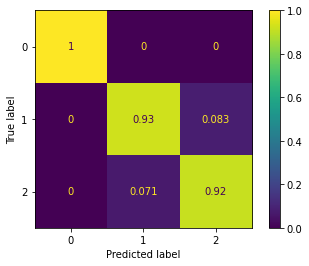

In [12]:
best_nb = GaussianNB(var_smoothing=0.01)
best_nb.fit(X_train, y_train)
nb_prediction = best_nb.predict(X_test)
print(f"Our NB got an accuracy of {round(accuracy_score(y_test, nb_prediction), 4)*100}% on the test set.")
plot_confusion_matrix(best_nb, X_test, y_test, normalize="pred");
# We'll use "pred" since the predicted values are, in fact, TP+FP

### SVC - Task 8
Let's now do the same thing for the Support Vector.

In [11]:
svc_params = [{'kernel': ['rbf'],
                    'gamma': [1e-3, 1e-4],
                    'C': [1, 10, 100, 1000]
                },
                {'kernel': ['linear'],
                'C': [1, 10, 100, 1000]
                }]
svc = SVC()
gs_svc = GridSearchCV(svc, param_grid=svc_params, scoring='accuracy')
gs_svc.fit(X_train, y_train)
gridsearch_report(gs_svc)

Best obtained score was 0.9673 for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Other params:
0.4181 (+/-0.0657) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.4181 (+/-0.0657) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.7585 (+/-0.1104) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.4181 (+/-0.0657) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.9673 (+/-0.0535) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.7585 (+/-0.1104) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.9673 (+/-0.0535) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.9673 (+/-0.0535) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.9673 (+/-0.0535) for {'C': 1, 'kernel': 'linear'}
0.9673 (+/-0.0535) for {'C': 10, 'kernel': 'linear'}
0.9561 (+/-0.0439) for {'C': 100, 'kernel': 'linear'}
0.9556 (+/-0.0831) for {'C': 1000, 'kernel': 'linear'}


We actually got the same accuracy. This sounds normal in an *artificial* dataset.
### Actual SVC testing - Task 9
Now, let's test the best model.

Our SVC got an accuracy of 93.55% on the test set.


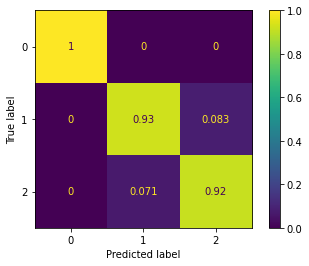

In [10]:
best_svc = SVC(C=100, gamma=0.001, kernel='rbf')
best_svc.fit(X_train, y_train)
svc_prediction = best_svc.predict(X_test)
print(f"Our SVC got an accuracy of {round(accuracy_score(y_test, svc_prediction), 4)*100}% on the test set.")
plot_confusion_matrix(best_svc, X_test, y_test, normalize="pred");